<a href="https://colab.research.google.com/github/davequinta/transfer-style-TFHub/blob/main/TransferStyle_TFHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img,channels=3)
  img = tf.image.convert_image_dtype(img,dtype=tf.float32)
  img = img[tf.newaxis,:]
  return img

In [ ]:
content_image = load_image('dog.jpeg') 
style_image =  load_image('fernando_llort2.jpg')

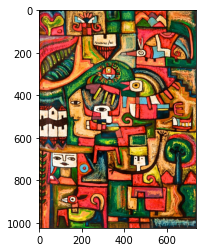

In [ ]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [ ]:
stylezed_image = model(tf.constant(content_image),tf.constant(style_image))[0]

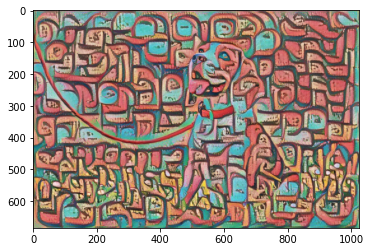

In [ ]:
plt.imshow(np.squeeze(stylezed_image))
plt.show()

In [ ]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylezed_image)*255, cv2.COLOR_BGR2RGB))

True